<a href="https://colab.research.google.com/github/yuuwatanabe/aws-study-group/blob/master/ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.2MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.0MB 21.1MB/s 
     |████████████████████████████████| 194kB 52.7MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 40kB 5.9MB/s 
     |████████████████████████████████| 92kB 11.2MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 2.6MB 54.1MB/s 
Mounted at /content/gdrive


In [2]:
!pip install fastai2

     |████████████████████████████████| 184kB 7.4MB/s 


In [3]:
# 動物の画像をダウンロード
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
# annotationsは無視してimageだけを見てみる
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_116.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_126.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_196.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_22.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_249.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_145.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_11.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_148.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_68.jpg')...]

In [7]:
fname = (path/"images").ls()[0]

In [8]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_116.jpg')

In [9]:
# ファイル名からラベルを作る
re.findall(r'(.+)_\d+.jpg$', fname.name)

['leonberger']

In [10]:
# 正規表現でラベル付をするためRegexLabellerを使う
pets = DataBlock(blocks= (ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(seed=42),
                    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                    item_tfms=Resize(460),
                    batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [11]:
pets

In [13]:
item_tfms=Resize(460),

In [15]:
batch_tfms = aug_transforms(size=224, min_scale=0.75)

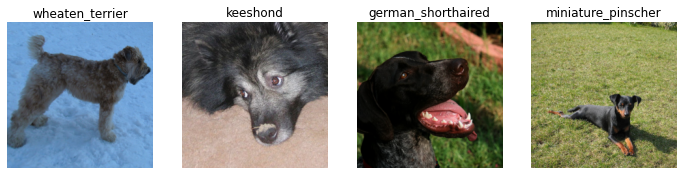

In [16]:
dls.show_batch(nrows=1, ncols=4)

In [18]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                            get_items=get_image_files,
                            splitter=RandomSplitter(seed=42),
                            get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Bombay_209.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x157
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Bombay_209.jpg
    applying partial gives
      Bombay
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(3)

Final sample: (PILImage mode=RGB size=300x157, TensorCategory(3))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}

Building one batch
Applying item_tfms to the f

RuntimeError: ignored

In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.496003,0.335467,0.117050,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.505158,0.282825,0.086604,01:09
1,0.326162,0.209620,0.067659,01:08


### Cross-Entropy Loss

In [20]:
# ひとつのバッチの値を引っ張ってくる
x, y = dls.one_batch()

In [22]:
x.shape

torch.Size([64, 3, 224, 224])

In [23]:
y.shape

torch.Size([64])

In [24]:
y

TensorCategory([16,  2, 25, 14,  0,  7, 30,  0, 18, 31, 21, 14,  2, 35,  8, 18, 26, 27, 26, 18, 23,  9, 10, 34, 19, 28, 27,  2, 27, 26,  1, 31, 13,  6, 22, 29, 32, 15, 36, 19, 25,  2, 34, 31,  8, 34, 22, 20,
         8, 18, 34, 34, 13, 30,  9, 36, 15, 26,  1,  3, 26, 10, 13, 17], device='cuda:0')

In [25]:
preds,_ = learn.get_preds(dl=[(x,y)])

In [26]:
preds[0]

tensor([1.9068e-05, 1.1325e-04, 4.6366e-04, 1.4318e-03, 5.3567e-02, 3.2914e-03, 5.7463e-06, 2.8611e-04, 1.1724e-05, 2.2083e-02, 2.2453e-04, 8.7134e-03, 1.2923e-02, 1.0579e-02, 5.7076e-04, 3.2056e-04,
        7.8324e-01, 7.7575e-05, 1.1551e-04, 1.7473e-04, 4.2482e-03, 5.3652e-05, 1.8351e-04, 9.1376e-05, 1.4509e-02, 2.3480e-05, 4.8775e-04, 5.6423e-05, 5.0929e-06, 1.9981e-02, 1.4444e-04, 3.4714e-04,
        5.1273e-05, 1.2246e-04, 6.1075e-02, 2.8698e-04, 1.2030e-04])

In [27]:
len(preds[0]),preds[0].sum()

(37, tensor(1.))

In [30]:
from fastai.plots import *

plot_function(torch.sigmoid, min=-4,max=4)

ModuleNotFoundError: ignored

In [31]:
# ６枚の画像と２つのカテゴリがあると考える
acts = torch.randn((6, 2))*2
acts

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

In [32]:
acts.sigmoid()

tensor([[0.0603, 0.7846],
        [0.0347, 0.3391],
        [0.2179, 0.7787],
        [0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099]])

In [34]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.0173, 0.0654, 0.0734, 0.2011, 0.8459, 0.9867])

In [36]:
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [37]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [38]:
def mnist_loss(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, 1-inputs, inputs).mean()